# [What is a neural network](https://www.knime.com/blog/a-friendly-introduction-to-deep-neural-networks)

- 첫번째 Hidden layer
$$
y = f(b + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4)
$$
- 두번째 Hidden layer
$$
y = f(b + w_1x_1 + w_2x_2 + w_3x_3)
$$

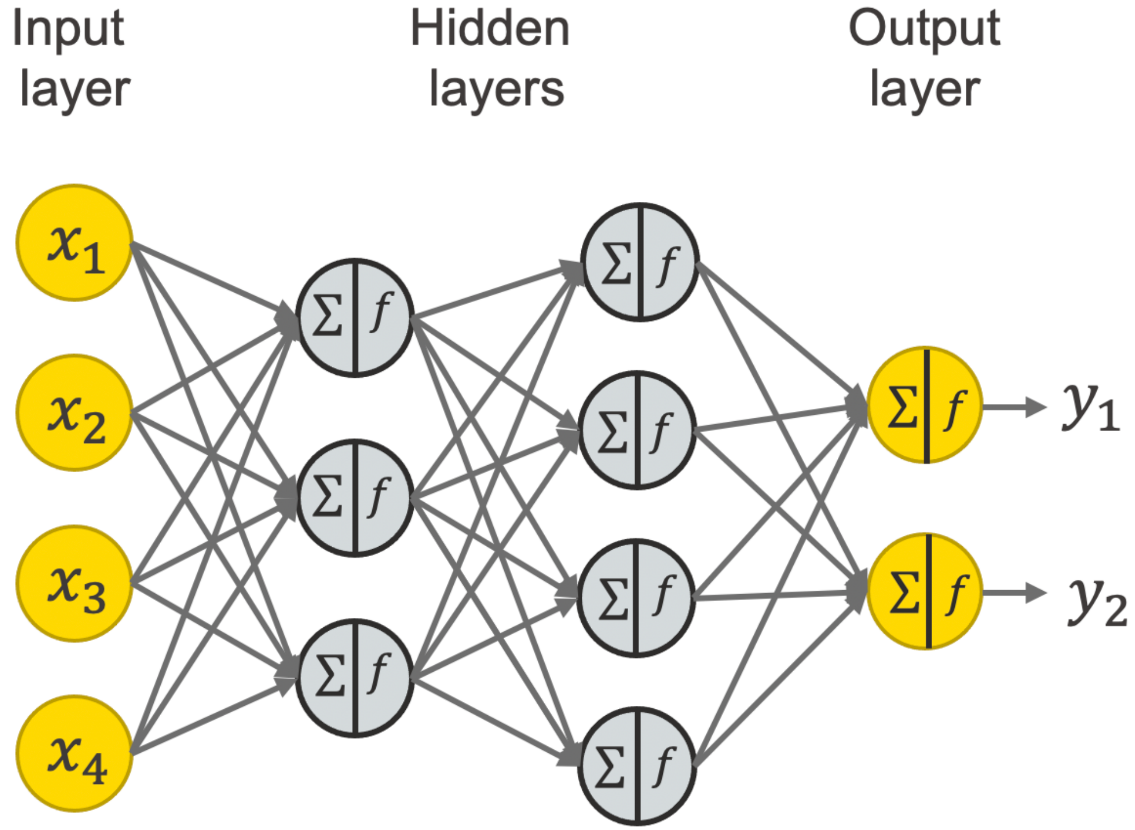

## Components of a neural network

- weight(가중치) = 네트워크의 출력이 예상 출력 값에 얼마나 근접하는지에 영향을 미칩니다.
- bias(편향) = 활성화 함수의 출력과 의도한 출력 간의 차이를 나타냅니다.
$$
y = f(w_1x_1 + w_2x_2 + b)
$$
$$
y = f(\sum{w_ix_i}+b)
$$

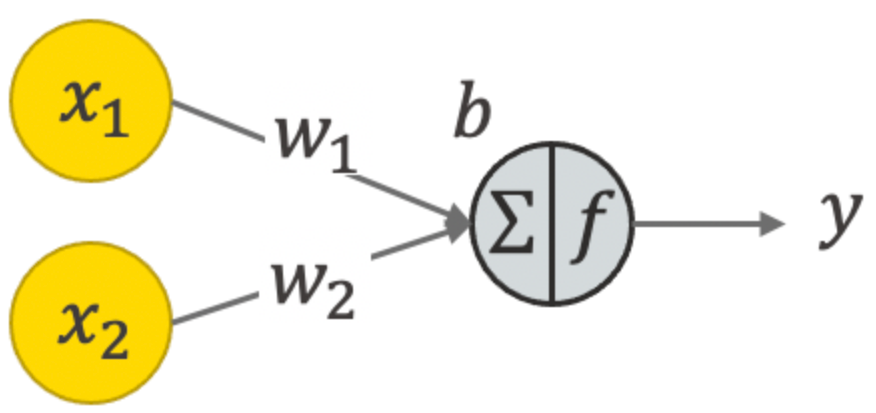

# [Build a neural network](https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/4-model)

In [1]:
%matplotlib inline
# 리눅스/윈도우 등과 같은 os를 사용할 수 있게 도와주는 모듈
import os

# deep learning 모델을 생성/학습/추론 등을 도와주는 모듈
import torch
# nn -> neural network -> 딥러닝 모델
from torch import nn
# torch의 DataLoader -> 딥러닝 모델이 학습을 할 수 있도록 데이터를 배치 크기 단위로 제공하는 모듈
from torch.utils.data import DataLoader
# datasets -> 학습용 데이터를 딥러닝 모델이 이해할 수 있도록 torch로 형변환하는 모듈
# transforms -> features 데이터를 전처리 해주는 모듈
from torchvision import datasets, transforms

## 1.Get a hardware device for training

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


## 2.Define the class

In [3]:
# 딥러닝 모델을 만들려면, nn.Module을 상속 받아야 함!!!
# -> 생성함수(__init__)
#    -> 학습함수에서 사용할 변수를 선언
# -> 학습함수(forward)
#    -> input으로 features 받아야 함!!
class NeuralNetwork(nn.Module):
    # 생성함수 -> 자식 클래스를 인스턴스화
    def __init__(self):
        # super() 부모 클래스 -> nn.Module
        # super().__init__() -> 부모 클래스를 인스턴스화
        super().__init__() # super(NeuralNetwork, self).__init__()
        # nn.Flatten() -> n 차원의 데이터를 vector로 변경해주는 함수
        # -> (28,28) -> (28*28,)
        self.flatten = nn.Flatten()
        # nn.Sequential -> 안에 있는 레이어를 순서대로 실행해주는 함수
        self.linear_relu_stack = nn.Sequential(
            # nn.Linear(input_size, output_size) -> 선형 모델

            # 첫번째 레이어의 input_size는 features_size와 같다!
            # -> 28*28 크기를 갖는 feature만 학습이 가능
            nn.Linear(28*28, 512),
            # nn.ReLU() -> 활성화 함수(선현 모델을 비선형 모델로 변경해주는 역할)
            nn.ReLU(),

            # 두번째 레이어의 input_size는 첫번째 레이어의 output_size와 같다.
            nn.Linear(512, 512),
            nn.ReLU(),

            # 세번째 레이어의 output_size는 target_size와 같다.
            # -> target_size는 10
            # 세번째 레이어의 input_size는 두번째 레이어의 output_size와 같다.
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x): # (batch_size, 28, 28)
        print("학습 시작했어요 ^^")
        out_flatten = self.flatten(x) # out_flatten: (batch_size, 28*28)
        logits = self.linear_relu_stack(out_flatten) # logits: (batch_size, 10)
        return logits

NeuralNetwork를 만들고 device에 적용

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [5]:
X = torch.rand(1, 28, 28, device=device)
# (batch_size, heigh_size, width_size)
X.shape

torch.Size([1, 28, 28])

In [6]:
X.to(device)
X.device

device(type='cpu')

In [7]:
# 학습 시작
logits = model(X)
# (batch_size, target_size)
logits.shape

학습 시작했어요 ^^


torch.Size([1, 10])

In [8]:
logits

tensor([[0.0365, 0.0713, 0.0041, 0.0000, 0.0898, 0.1026, 0.0000, 0.0000, 0.0344,
         0.0000]], grad_fn=<ReluBackward0>)

In [9]:
# nn.Softmax -> 예측값을 확률값으로 변경
pred_probab = nn.Softmax(dim=1)(logits)
# (batch_size, proba_size)
pred_probab.shape

torch.Size([1, 10])

In [10]:
pred_probab

tensor([[0.1002, 0.1037, 0.0970, 0.0966, 0.1057, 0.1070, 0.0966, 0.0966, 0.1000,
         0.0966]], grad_fn=<SoftmaxBackward0>)

In [11]:
# 확률의 합은 항상 1이다.
pred_probab.sum(dim=1)

tensor([1.], grad_fn=<SumBackward1>)

In [12]:
# pred_probab -> (batch_size, proba_size)
# argmax() -> 가장 큰 index값을 리턴
# pred_probab.argmax(dim=1)
# -> proba_size(확률)에서 가장 큰 index 값 리턴
#    -> 0 ~ 9 사이의 숫자
y_pred = pred_probab.argmax(dim=1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


## 3.Weight and Bias

In [13]:
print(f"1 Linear weights: {model.linear_relu_stack[0].weight.shape} \n") # (512, 28*28)
print('-'*50)
print(f"1 Linear weights: {model.linear_relu_stack[0].bias.shape} \n") # (512)

1 Linear weights: torch.Size([512, 784]) 

--------------------------------------------------
1 Linear weights: torch.Size([512]) 



In [14]:
print(f"2 Linear weights: {model.linear_relu_stack[2].weight.shape} \n") # (512, 512)
print('-'*50)
print(f"2 Linear weights: {model.linear_relu_stack[2].bias.shape} \n") # (512, 512)

2 Linear weights: torch.Size([512, 512]) 

--------------------------------------------------
2 Linear weights: torch.Size([512]) 



In [15]:
print(f"3 Linear weights: {model.linear_relu_stack[4].weight.shape} \n") # (10, 512)
print('-'*50)
print(f"3 Linear weights: {model.linear_relu_stack[4].bias.shape} \n") # (10)

3 Linear weights: torch.Size([10, 512]) 

--------------------------------------------------
3 Linear weights: torch.Size([10]) 



In [16]:
model.linear_relu_stack[4].weight

Parameter containing:
tensor([[-0.0071,  0.0086,  0.0301,  ...,  0.0281, -0.0350,  0.0328],
        [ 0.0209, -0.0027, -0.0258,  ..., -0.0195, -0.0110,  0.0344],
        [ 0.0420,  0.0040, -0.0186,  ...,  0.0078,  0.0105,  0.0089],
        ...,
        [-0.0409, -0.0263,  0.0035,  ..., -0.0130,  0.0029,  0.0304],
        [-0.0013,  0.0054, -0.0308,  ..., -0.0139, -0.0007,  0.0088],
        [-0.0067,  0.0407,  0.0009,  ..., -0.0253, -0.0373, -0.0239]],
       requires_grad=True)

In [17]:
model.linear_relu_stack[4].bias

Parameter containing:
tensor([ 0.0156,  0.0235,  0.0396,  0.0140, -0.0016,  0.0260, -0.0374, -0.0219,
         0.0153, -0.0285], requires_grad=True)

## 4.Model layers

In [18]:
# (batch_size, features1, features2)
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

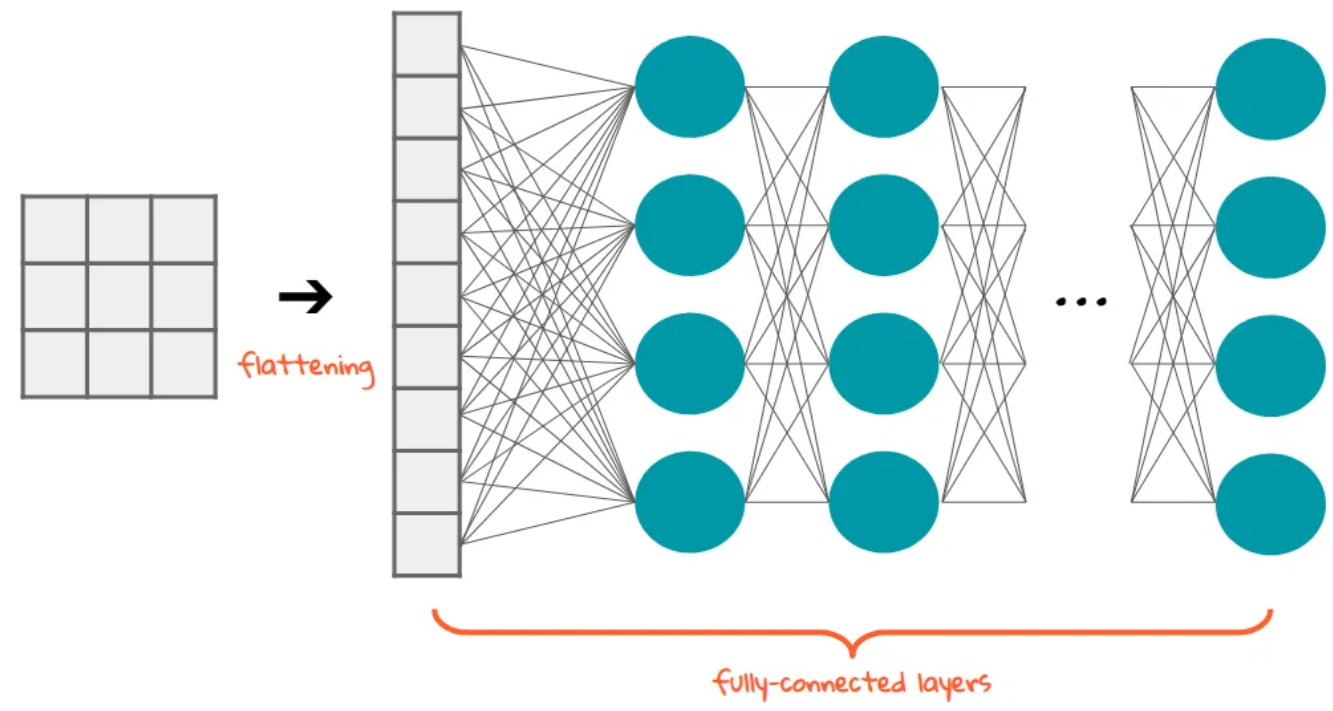

In [19]:
# flatten 생성
flatten = nn.Flatten()

flat_image = flatten(input_image) # (3, 28, 28)
print(flat_image.size()) # (3, 28 * 28)

torch.Size([3, 784])


### nn.Linear

In [20]:
# linear 생성
layer1 = nn.Linear(in_features=28*28, out_features=20)

hidden1 = layer1(flat_image) # flat_image -> (3, 28 * 28)
print(hidden1.size()) # hidden1 -> (3, 20)

torch.Size([3, 20])


In [21]:
hidden1

tensor([[ 0.2826, -0.4782, -0.0358, -0.6311,  0.4889, -0.1665,  0.4779, -0.1052,
          0.1502,  0.0660,  0.3299,  0.6115, -0.2084,  0.5777,  0.0515,  0.0722,
          0.6335,  0.0632,  0.4001, -0.4047],
        [ 0.3017, -0.1036, -0.2424, -0.7319,  0.1596,  0.1269,  0.4524, -0.1588,
          0.0712, -0.0481,  0.3125,  0.6833, -0.2455,  0.7615,  0.1625, -0.0434,
          0.7479,  0.2325,  0.1314, -0.1276],
        [ 0.4567, -0.5776, -0.2184, -0.3951,  0.1225, -0.0140,  0.4541, -0.0516,
         -0.1272, -0.0818,  0.3577,  0.7219, -0.2957,  0.5377,  0.0630, -0.1395,
          0.9187,  0.3089, -0.1543, -0.1834]], grad_fn=<AddmmBackward0>)

### nn.ReLU
Linear output: x = weight * input + bias       
ReLU: f(x) = 0 if x < 0 else x

In [22]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2826, -0.4782, -0.0358, -0.6311,  0.4889, -0.1665,  0.4779, -0.1052,
          0.1502,  0.0660,  0.3299,  0.6115, -0.2084,  0.5777,  0.0515,  0.0722,
          0.6335,  0.0632,  0.4001, -0.4047],
        [ 0.3017, -0.1036, -0.2424, -0.7319,  0.1596,  0.1269,  0.4524, -0.1588,
          0.0712, -0.0481,  0.3125,  0.6833, -0.2455,  0.7615,  0.1625, -0.0434,
          0.7479,  0.2325,  0.1314, -0.1276],
        [ 0.4567, -0.5776, -0.2184, -0.3951,  0.1225, -0.0140,  0.4541, -0.0516,
         -0.1272, -0.0818,  0.3577,  0.7219, -0.2957,  0.5377,  0.0630, -0.1395,
          0.9187,  0.3089, -0.1543, -0.1834]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2826, 0.0000, 0.0000, 0.0000, 0.4889, 0.0000, 0.4779, 0.0000, 0.1502,
         0.0660, 0.3299, 0.6115, 0.0000, 0.5777, 0.0515, 0.0722, 0.6335, 0.0632,
         0.4001, 0.0000],
        [0.3017, 0.0000, 0.0000, 0.0000, 0.1596, 0.1269, 0.4524, 0.0000, 0.0712,
         0.0000, 0.3125, 0.6833, 0.0000, 0.7615, 0.16

### nn.Sequential

In [23]:
# nn.Sequential -> 안에 있는 레이어를 순서대로 실행
seq_modules = nn.Sequential(
    flatten,
    layer1, # (28*28, 20)
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3,28,28)

logits = seq_modules(input_image)

logits.shape

torch.Size([3, 10])

### nn.Softmax

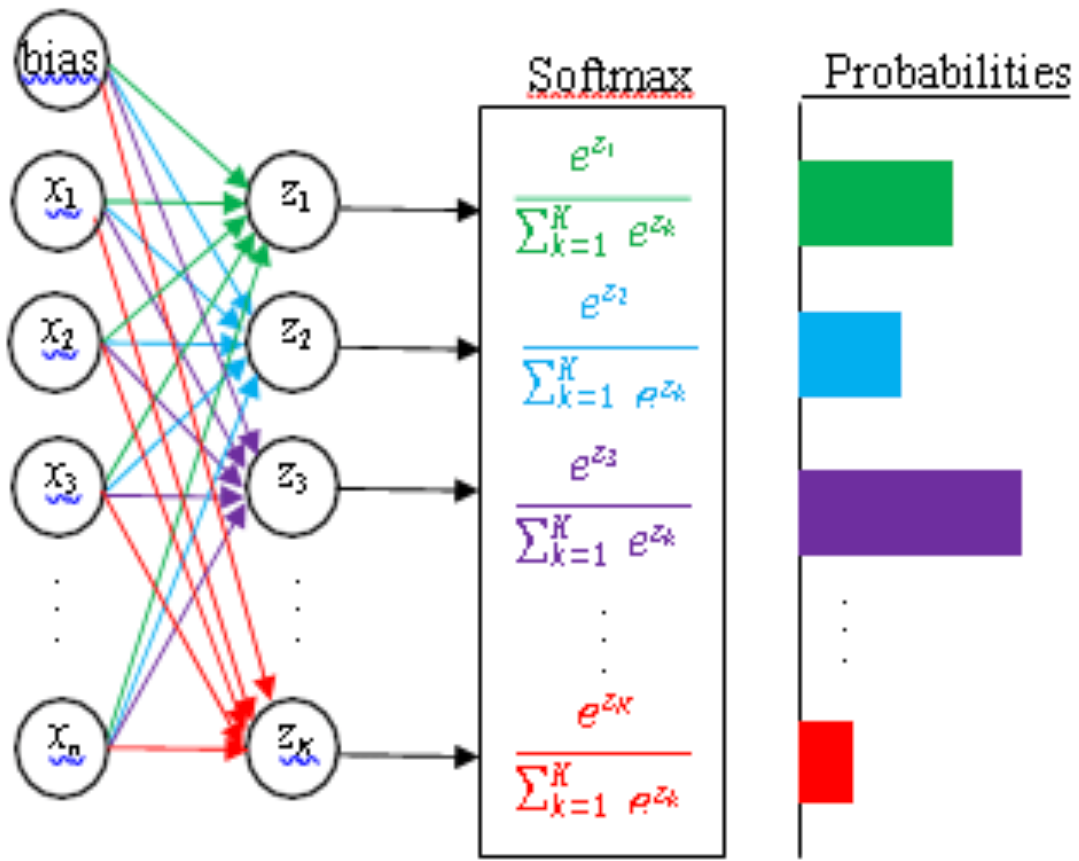

In [24]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab.shape

torch.Size([3, 10])

## 5.Model parameters

In [25]:
print("Model structure: ", model, "\n\n")

for i, (name, param) in enumerate(model.named_parameters()):
    print(f"{i}번째, Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


0번째, Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0051, -0.0264,  0.0349,  ..., -0.0113, -0.0163,  0.0005],
        [-0.0279, -0.0011, -0.0182,  ..., -0.0355, -0.0305, -0.0042]],
       grad_fn=<SliceBackward0>) 

1번째, Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0289, -0.0258], grad_fn=<SliceBackward0>) 

2번째, Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0179, -0.0038, -0.0322,  ..., -0.0206, -0.0286, -0.0135],
        [ 0.0012, -0.0280, -0.0273,  ..., -0.0417,  0.0397,  0.0163]],
       grad_fn=<SliceBackward0>) 

3

# Automatic differentiation(자동미분)
- Gradient Descent를 이용해 손실함수의 최솟값을 쫓아가면서 가중치들을 업데이트하는 것을 말합니다.
- Automatic differentiation은 Forward Propagation(순전파) -> Backward Propagation(역전파) 순서로 진행됩니다.

## Forward Propagation(순전파)
> 신경망은 정답을 맞추기 위해 최선의 추측을 합니다. 이렇게 추측을 하기 위해서 입력 데이터를 각 함수들에서 실행합니다.

## Backward Propagation(역전파)
> 신경망은 추측한 값에서 발생한 오류에 비례하여 매개변수들을 적절히 조절합니다.

## Tensors, Functions and Computational graph
- `y`: target
- `x`: features
- `z`: prediction
- `CE`: loss function
  - target과 prediction 차이를 숫자로 표현하는 함수
$$
z = b + wx
$$
$$
loss = ce(z, y)
$$

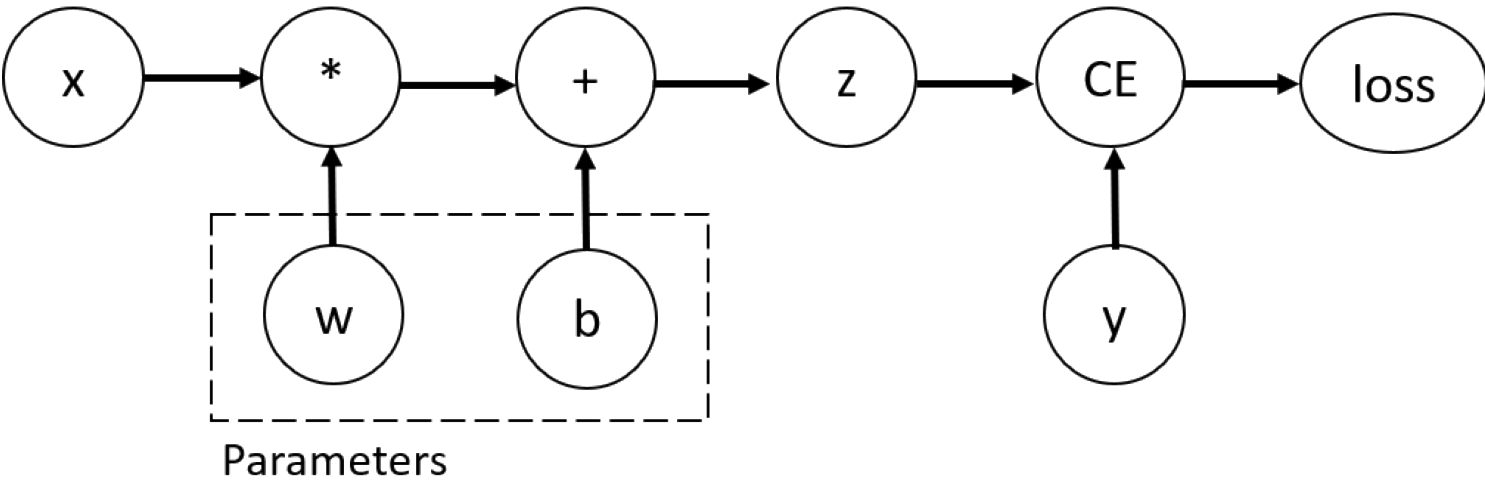

In [27]:
%matplotlib inline
import torch

In [29]:
x = torch.ones(5)  # input tensor
print(x.shape)
x

torch.Size([5])


tensor([1., 1., 1., 1., 1.])

In [30]:
y = torch.zeros(3)  # expected output
print(y.shape)
y

torch.Size([3])


tensor([0., 0., 0.])

In [31]:
w = torch.randn(5, 3, requires_grad=True)
print(w.shape)
w

torch.Size([5, 3])


tensor([[ 0.6376, -1.1153,  0.0048],
        [ 0.8993,  0.1310,  1.8027],
        [ 2.0284, -0.1759, -1.0564],
        [-0.5670,  0.7051, -0.2857],
        [-0.2217, -0.3379, -1.1405]], requires_grad=True)

In [33]:
b = torch.randn(3, requires_grad=True)
print(b.shape)
b

torch.Size([3])


tensor([ 0.4174, -0.1021, -0.3276], requires_grad=True)

In [34]:
# torch.bmm() vs torch.matmul()
# (5,) x (5,3) -> (3,)
z = torch.matmul(x, w) + b # wx + b
print(z.shape)
z

torch.Size([3])


tensor([ 3.1941, -0.8950, -1.0026], grad_fn=<AddBackward0>)

In [35]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(1.2965, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [36]:
w

tensor([[ 0.6376, -1.1153,  0.0048],
        [ 0.8993,  0.1310,  1.8027],
        [ 2.0284, -0.1759, -1.0564],
        [-0.5670,  0.7051, -0.2857],
        [-0.2217, -0.3379, -1.1405]], requires_grad=True)

In [37]:
b

tensor([ 0.4174, -0.1021, -0.3276], requires_grad=True)

In [38]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x79d92ee175b0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x79d92ee15cf0>


## Computing gradients

In [39]:
loss.backward()

print(w.grad)
print(b.grad)

tensor([[0.3202, 0.0967, 0.0895],
        [0.3202, 0.0967, 0.0895],
        [0.3202, 0.0967, 0.0895],
        [0.3202, 0.0967, 0.0895],
        [0.3202, 0.0967, 0.0895]])
tensor([0.3202, 0.0967, 0.0895])


## Disabling gradient tracking

In [40]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): # No gradient tracking(테스트용)
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


another way to achieve the same result is to use the `detach()` method on the tensor

In [41]:
z = torch.matmul(x, w)+b
z_det = z.detach() # No gradient tracking(테스트용)
print(z_det.requires_grad)

False
